## Project Task

Predict whether the patients in the dataset have DIABETES or NOT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_dia=pd.read_csv("health care diabetes.csv")

In [3]:
data_dia.shape

(768, 9)

In [4]:
data_dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#We will check any missing values in our database using info function

data_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#No missing values from above info() but there are many zero values... We need to put mean or median values to get perfect model  

In [7]:
#To find out zero values in our database

data_dia.all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

In [8]:
data_dia.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
data_dia.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
(data_dia==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
(data_dia["Pregnancies"]==0).sum()

111

In [12]:
# Finding missing values of Glucose, BloodPressure, SkinThickness, Insulin and BMI

(data_dia[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]==0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

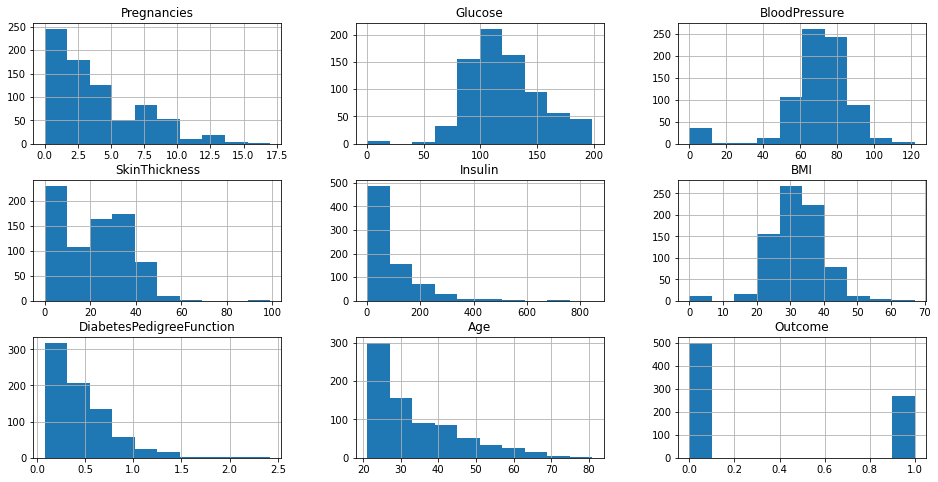

In [13]:
# Visually explore all variables,looking for the distribution of given variables using histograms

data_dia.hist(figsize=(16,8))

In [14]:
#(data_dia["Pregnancies"]==0).replace(value=3)

In [15]:
data_dia.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [16]:
#For learning purpose only

data_dia["Pregnancies"].replace(0,3)

0       6
1       1
2       8
3       1
4       3
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [17]:
data_dia2=data_dia.replace(0,data_dia.median())

In [18]:
data_dia2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [19]:
#checking is there any missing values available...

data_dia2.all()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

In [20]:
#checking is there any missing values available...


(data_dia2==0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [21]:
data_dia2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [22]:
data_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
#sns.countplot(data=data_dia2.dtypes)

data_dia2.dtypes.value_counts()

int64      6
float64    3
dtype: int64

In [24]:
count_dtypes=data_dia2.dtypes.value_counts()
count_dtypes

int64      6
float64    3
dtype: int64

In [25]:
#data_dia2.dtypes.value_counts()

#sns.histplot(data=data_dia2.dtypes.value_counts())

#(data=data_dia2.dtypes.value_counts())
#plt.show()

In [26]:
#Checking balance of the data by plotting the count of outcomes by their value

#data_dia2.groupby(by=["Outcome"])

data_dia2["Outcome"].groupby(data_dia2.Outcome).count()



Outcome
0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

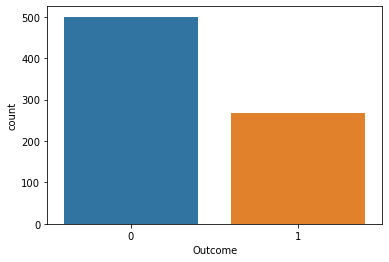

In [27]:
#Checking balance of the data by plotting the count of "outcomes" by their value

sns.countplot(x=data_dia2["Outcome"])

From above graph it is clear that there are 500 patients who dont have diabetes symptones an remaining 268 have. Now we need to focus on correlation between our data sets with our "Outcome"

In [28]:
data_dia2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [29]:
data_dia2[["Outcome","Pregnancies"]].corr()

,Outcome,Pregnancies
Outcome,1.000000,0.245466
Pregnancies,0.245466,1.000000


In [30]:
#looking for corelationships

data_corr=data_dia2.corr()
data_corr["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312249
Pregnancies                 0.245466
Age                         0.238356
SkinThickness               0.189065
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.148457
Name: Outcome, dtype: float64

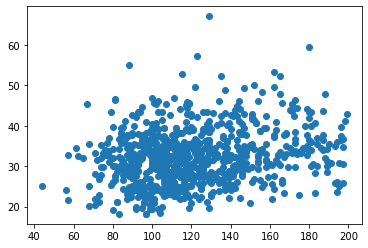

In [31]:
#Creating scatter charts between the pair of variables to understand the relationships

plt.scatter(x=data_dia2.Glucose ,y=data_dia2.BMI)

plt.show()

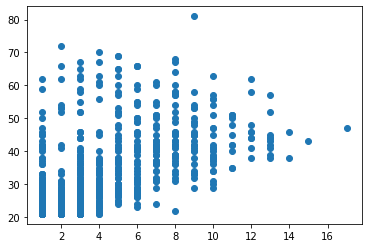

In [32]:
plt.scatter(x=data_dia2.Pregnancies ,y=data_dia2.Age)
plt.show()

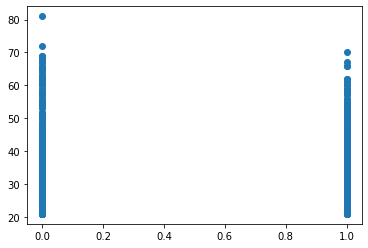

In [33]:
plt.scatter(x=data_dia2.Outcome ,y=data_dia2.Age)
plt.show()

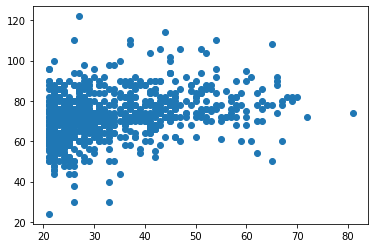

In [34]:
plt.scatter(x=data_dia2.Age ,y=data_dia2.BloodPressure)

From aboves scatter plot, I am finding relation ship of each varible with other. For example  Age vs Bloodpressure...Its clear that at age 20 to 30 bloodpressure is normal 

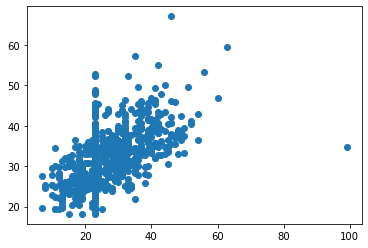

In [35]:
plt.scatter(x=data_dia2.SkinThickness ,y=data_dia2.BMI)

<AxesSubplot:>

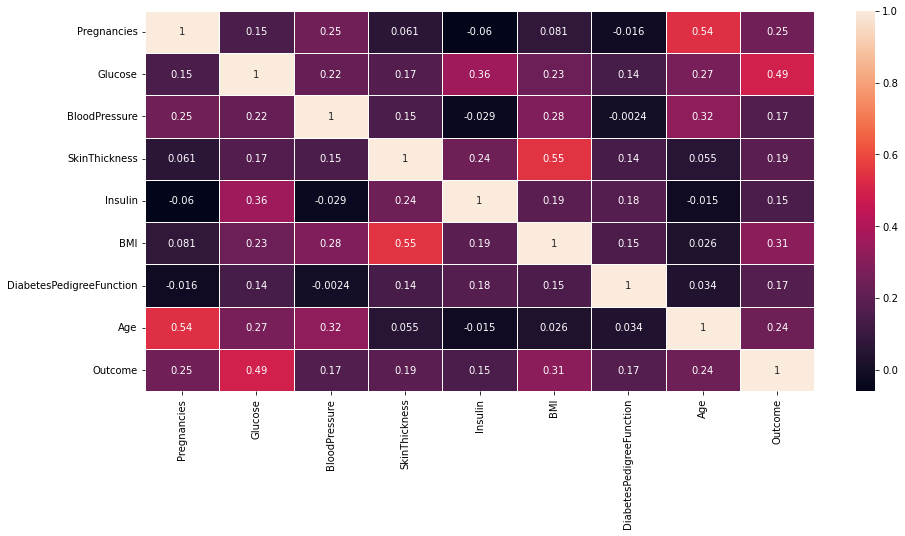

In [36]:
#Performed correlation analysis. Visually explore it using a heatmap.

plt.figure(figsize=(15,7))
sns.heatmap(data_dia2.corr(),annot=True,linewidth=.5)

## Model building 

In [41]:
# Train and Test spliting => 
# Assigning our data to features and target element for the purpose X_train,Y_train and x_test and y_test 

features = data_dia2.drop("Outcome",axis=1)
target = data_dia2[["Outcome"]]

print("Main Data Shape : ",data_dia2.shape)
print("Features Data Shape : ",features.shape)
print("target Data Shape : ",target.shape)

Main Data Shape :  (768, 9)
Features Data Shape :  (768, 8)
target Data Shape :  (768, 1)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,random_state=42)

In [45]:
print("X_train size : ",X_train.shape)
print("y_train size : ",y_train.shape)
print("X_test size : ",X_test.shape)
print("y_test size : ",y_test.shape)


X_train size :  (576, 8)
y_train size :  (576, 1)
X_test size :  (192, 8)
y_test size :  (192, 1)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [48]:
LogisticR_model_diabetes=LogisticRegression().fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
my_predict=LogisticR_model_diabetes.predict(X_train)

print("Actual values : ",y_train)
print("My Predict : ",my_predict)

Actual values :       Outcome
357        1
73         0
352        0
497        0
145        0
..       ...
71         0
106        0
270        1
435        1
102        0

[576 rows x 1 columns]
My Predict :  [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('TRAIN DATA RESULTS')

print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_predict))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_predict))
#print('Training Set R squared score : ', my_linear_reg.score(X_train, y_train))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  0.2204861111111111
Mean Squared Error on Train data :  0.2204861111111111
